In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [33]:
dataset = pd.DataFrame([[1000],[2000],[3000],[4000],[5000],[6000],[7000],[10000000],[9000],[10000],[np.nan]], columns=['sal'])

In [41]:
dataset.dropna(inplace=True)

In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sal     10 non-null     float64
dtypes: float64(1)
memory usage: 216.0 bytes


In [6]:
dataset.describe() #Returns the statistical summary of NUMERICAL column

,sal
count,1.000000e+01
mean,1.004500e+06
std,3.160698e+06
min,1.000000e+03
25%,3.250000e+03
50%,5.500000e+03
75%,7.750000e+03
max,1.000000e+07


<ipython-input-32-fe641e109b59>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['sal'])


<Axes: xlabel='sal', ylabel='Density'>

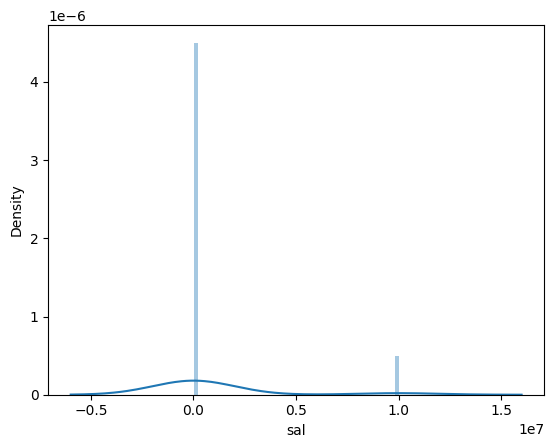

In [32]:
sns.distplot(dataset['sal'])

In [8]:
#Outlier Detection and Removal
#Identify Outliers ---- 1.5 IQR Rule


In [36]:
def outlierDetector(column):
  #1. Sort the data in ascending order
  sorted(column)
  #2. Get Q1 and Q3
  Q1,Q3 = np.percentile(column,[25,75])
  #3. Calc IQR
  IQR = Q3 - Q1
  #4. Based on IQR lets calc the valid range
  lowerRange = Q1 - (1.5 * IQR)
  upperRange = Q3 + (1.5 * IQR)

  return lowerRange,upperRange

In [23]:
#Hired by Donald Trump ----- To identify wthat is the standard of living of General People in US?
dataset['sal'].mean()

1004700.0

In [42]:
#Step1: Identify the valid range of the sample
lr,ur = outlierDetector(dataset['sal'])

In [43]:
lr

-4625.0

In [44]:
ur

16375.0

In [18]:
#Delete the outliers
processedData = dataset[ (dataset['sal']>=lr) & (dataset['sal']<= ur) ]

<ipython-input-19-bb1b5099e87b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(processedData['sal'])


<Axes: xlabel='sal', ylabel='Density'>

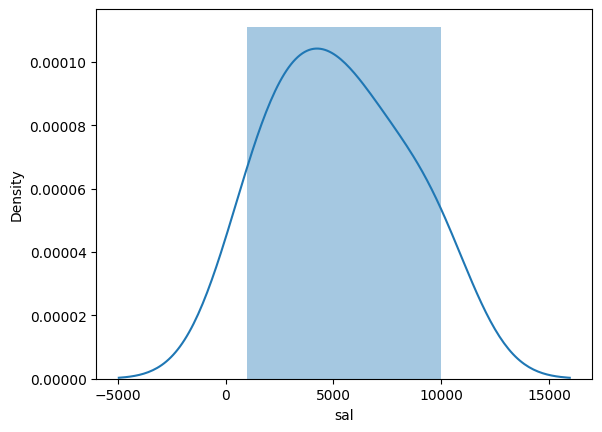

In [19]:
sns.distplot(processedData['sal'])

In [16]:
#Hired by Donald Trump ----- To identify wthat is the standard of living of General People in US?
processedData['sal'].mean()

5000.0

In [ ]:
processed